In [ ]:
'''
推荐引擎产生推荐的两种方式：协同过滤(collaborative filtering)，基于内容的过滤(content-based filtering)
CF从当前用户过去的行为和其他用户对该用户的评分来构建模型；
CBF用商品本身的特征（商品间的相似度）为用户推荐更多的商品
1.对数据进行特征处理
2.构建ML pipeline
3.KNN: classifier & regressor
4.计算欧式距离分数（Euclidean distance score）
5.计算皮尔逊相关系数（Pearson correlation score）
6.聚类用户，并生成相关推荐
'''

In [9]:
'''
map()接收一个函数f和一个序列list作为参数，并通过f依次作用在list的每一个元素上并返回一个新的list
python3中，map()返回的是一个iterator迭代器，不是序列<map object at 0x...>
若要实现返回序列的效果，需转成序列list(map(f,list))
'''
# 函数组合
import numpy as np
from functools import reduce
# 定义几个小程序，返回值为map
def add3(input_array):
    return map(lambda x: x+3, input_array)

def mul2(input_array):
    return map(lambda x: x*2, input_array)

def sub5(input_array):
    return map(lambda x: x-5, input_array)

# 定义组合函数，将上面的小程序作为输入参数
def function_composer(*args):
    return reduce(lambda f,g: lambda x: f(g(x)), args)

arr = np.array([2,5,4,7])
print("\nOperation: add3(mul2(sub5(arr)))")
arr1 = add3(arr)
arr2 = mul2(arr1)
arr3 = sub5(arr2)
print("\nOutput using the lengthy way: ",list(arr3))

func_composed = function_composer(sub5, mul2, add3)
print("\nOutput using function composition :",list(func_composed(arr)))

print("\nOperation: sub5(add3(mul2(sub5(mul2(arr)))))\nOutput:",list(function_composer(add3,mul2,sub5,mul2)(arr)))




Operation: add3(mul2(sub5(arr)))

Output using the lengthy way:  [5, 11, 9, 15]

Output using function composition : [5, 11, 9, 15]

nOperation: sub5(add3(mul2(sub5(mul2(arr)))))
Output: [1, 13, 9, 21]


In [14]:
# 构建ML PipeLine : 预处理，特征选择，(非)监督学习函数等
from sklearn.datasets import samples_generator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# 生成示例: 20维的特征向量
X, Y = samples_generator.make_classification(n_informative=4, n_features=20, 
                                             n_redundant=0, random_state=5)

# 第一步，在数据点进一步操作之前选择k个最好的特征:基于单变量与因变量之间的相关性，进行的特征选择
# 特征选择器
selector_k_best = SelectKBest(f_regression, k=10)

# 第二步，用随机森林分类器分类数据
classifier = RandomForestClassifier(n_estimators=50, max_depth=4)

# ML Pipeline
# 'selector'是特征选择器的名称，'rf是随机森林分类器的名称
pipeline_classifier = Pipeline([('selector', selector_k_best),('rf', classifier)])

# 使用上面步骤中的命名名称，可以修改其参数
# pipeline_classfier.set_params(selector__k=6, rf__n_estimators=25)

# training
pipeline_classifier.fit(X, Y)
prediction = pipeline_classifier.predict(X)
print("\nPredict :",prediction)

# validation
print("\nScore:",pipeline_classifier.score(X,Y))

# 打印被分类器选中的特征
features_status = pipeline_classifier.named_steps['selector'].get_support()
selected_features = []
for index, item in enumerate(features_status):
    if item:
        selected_features.append(index)
print("\nSelected features (0-indexed):", ', '.join([str(x) for x in selected_features]))

print(features_status)


Predict : [1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1]

Score: 0.97

Selected features (0-indexed): 0, 5, 7, 9, 10, 11, 13, 15, 16, 18
[ True False False False False  True False  True False  True  True  True
 False  True False  True  True False  True False]


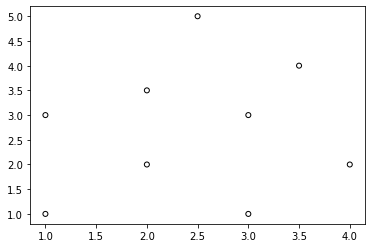

(array([[0.67082039, 0.80622577, 1.36014705]]), array([[2, 4, 7]], dtype=int64))

K nearest neighbors
1-->  [2. 2.]
2-->  [3. 1.]
3-->  [3. 3.]


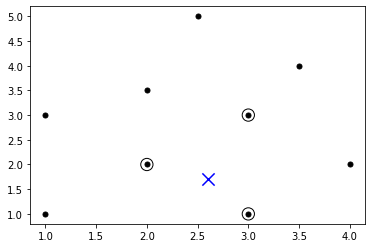

In [31]:
# K nearest neighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X = np.array([[1, 1], [1, 3], [2, 2], [2.5, 5], [3, 1],
[4, 2], [2, 3.5], [3, 3], [3.5, 4]])
plt.figure()
plt.scatter(X[:,0],X[:,1],s=25,edgecolor='black',facecolor='none',marker='o')
plt.show()

# 最近邻数量
num_neighbors = 3
input_point = np.array([[2.6, 1.7]])

# training
knn = NearestNeighbors(n_neighbors=num_neighbors, algorithm='ball_tree').fit(X)

# output
print(knn.kneighbors(input_point))
distance, indices = knn.kneighbors(input_point)
# print("\nDistance :",distance)
# print("\nindices :",indices)

print('\nK nearest neighbors')
for rank, index in enumerate(indices[0][:num_neighbors]):
    print(str(rank + 1) + '--> ',X[index])
    
# plot
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker='o', s=150, color='k', facecolor='none')
plt.scatter(input_point[0][0], input_point[0][1], marker='x', s=150, color='k', facecolor='blue')
plt.show()

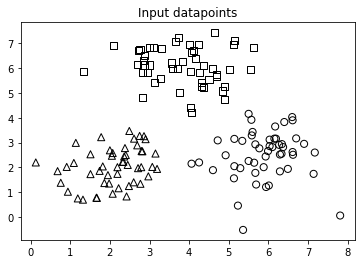

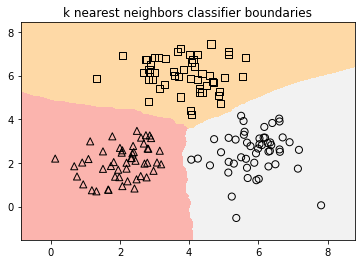

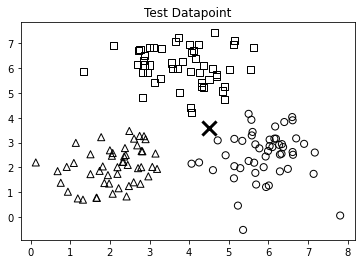

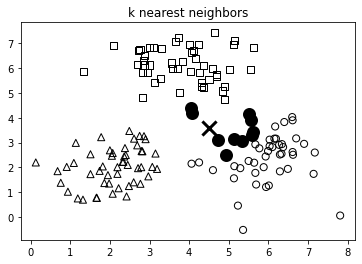


Predicted output : 2


In [52]:
# 构建KNN分类器
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

def load_data(input_file):
    X = []
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)
    X = np.array(X)
    return np.array(X[:,:-1]).astype(float), np.array(X[:,-1]).astype(int)

X, Y = load_data('data_nn_classifier.txt')
# print(X[:5],Y[:5])
# print(np.unique(Y))

# plot
plt.figure()
plt.title("Input datapoints")
markers = '^sov<>hp'
mapper = np.array([markers[i] for i in Y])
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolor='black',facecolor='none')

plt.show()

# knn num
num_neighbors = 10

# 边界可视化，定义一个网格，以评价该分类器
h = 0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# training
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, Y)

# 计算网格中所有点的输出
predicted_values = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
predicted_values = predicted_values.reshape(x_grid.shape)

# plot
plt.figure()
plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1, shading='auto')

# plot training datapoints
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolor='black', facecolor='none')

plt.xlim(x_grid.min(), x_grid.max())
plt.ylim(y_grid.min(), y_grid.max())
plt.title("k nearest neighbors classifier boundaries")
plt.show()

# test input datapoint
test_datapoint = np.array([4.5, 3.6])

plt.figure()
plt.title("Test Datapoint")
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolor='black', facecolor='none')

plt.scatter(test_datapoint[0],test_datapoint[1], marker='x', linewidth=3, s=200, facecolor='black')
plt.show()

# 提取KNN
dist, indices = classifier.kneighbors(np.array(test_datapoint).reshape(1, -1))
plt.figure()
plt.title("k nearest neighbors")
for i in indices:
    plt.scatter(X[i,0], X[i,1], marker='o', linewidth=3, s=100, facecolor='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', linewidth=3, s=200, facecolor='black')

for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolor='black', facecolor='none')
plt.show()

# 打印分类器输出结果
print("\nPredicted output :", classifier.predict(np.array(test_datapoint).reshape(1, -1))[0])

In [53]:
test_datapoint = np.array([4.5, 3.6])
print(np.array(test_datapoint).reshape(1, -1))
print("\nPredicted output :", classifier.predict(np.array(test_datapoint).reshape(1, -1)))

[[4.5 3.6]]

Predicted output : [2]


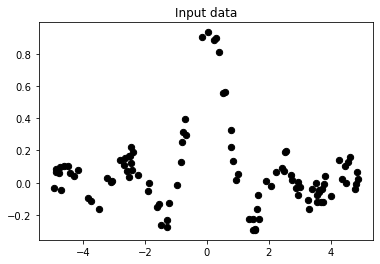

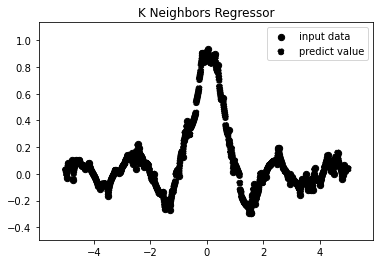

In [62]:
# 构建 KNN Regressor

# 生成服从正态分布的样本数据
amplitude = 10
num_points = 100
X = amplitude * np.random.rand(num_points, 1) - 0.5 * amplitude

# 加入噪声数据
y = np.sinc(X).ravel()
y += 0.2 * (0.5 - np.random.rand(y.size))

# plot
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolor='none')
plt.title("Input data")
plt.show()

# 定义更密集的网格点
x_values = np.linspace(-0.5*amplitude, 0.5*amplitude, 10*num_points)[:, np.newaxis]

# knn nums
n_neighbors = 8

# knn regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_values = knn_regressor.fit(X, y).predict(x_values)

# 输入与输出数据交叠在一起，查看regressor性能
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolor='none', label='input data')
plt.scatter(x_values, y_values, linewidth=1, c='k', linestyle='--', label='predict value')
plt.xlim(X.min()-1, X.max()+1)
plt.ylim(y.min()-0.2, y.max()+0.2)
#plt.aopxis('tight')
plt.legend()
plt.title("K Neighbors Regressor")
plt.show()